In [1]:
import tensorflow as tf
from tensorflow import keras
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from keras.layers import Dense, Flatten
from keras import Input
from tensorflow.keras.utils import plot_model

from tensorflow.keras.datasets import boston_housing

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from sklearn.preprocessing import StandardScaler



from sklearn.model_selection import KFold


In [2]:

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42,shuffle = True)


In [3]:
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.553694,-0.483615,1.028326,-0.256833,1.038381,0.235458,1.110488,-0.939769,1.675886,1.565287,0.784476,-3.484596,2.250921
1,-0.392427,-0.483615,-0.160878,-0.256833,-0.088401,-0.499474,0.856063,-0.683962,-0.396036,0.157078,-0.307596,0.427331,0.478801
2,-0.399829,-0.483615,-0.869402,-0.256833,-0.361560,-0.397910,-0.846076,0.528643,-0.511142,-1.094663,0.784476,0.448077,-0.414159
3,-0.267805,-0.483615,1.245881,3.893584,0.406700,-0.024096,0.845313,-0.957671,-0.511142,-0.017443,-1.718189,-0.168767,-0.999345
4,-0.398037,-0.483615,-0.972300,-0.256833,-0.924950,-0.206066,-0.437562,0.003615,-0.741356,-0.956249,0.010925,0.429459,-0.593580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-0.029345,-0.483615,1.028326,3.893584,1.371293,3.544770,0.497718,-0.905247,1.675886,1.565287,0.784476,-0.002481,-1.028329
98,-0.397230,-0.483615,0.253653,-0.256833,-1.027385,0.008348,-2.257955,0.252123,-0.511142,-0.047533,0.101931,0.427012,-0.822685
99,-0.207095,-0.483615,1.245881,3.893584,0.406700,2.165185,1.045986,-0.838176,-0.511142,-0.017443,-1.718189,0.370519,-1.493441
100,-0.366986,-0.483615,-0.720935,3.893584,-0.429849,0.964748,0.698391,-0.433284,-0.165822,-0.595170,-0.489608,0.392755,-0.418300


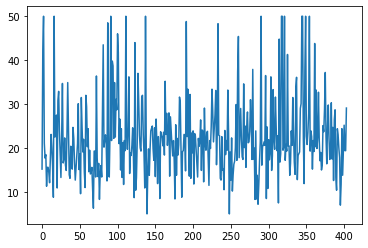

In [4]:
plt.plot(y_train)


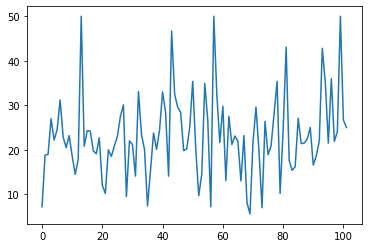

In [5]:
plt.plot(y_test)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                896       
                                                                 
 second_layer (Dense)        (None, 64)                4160      
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


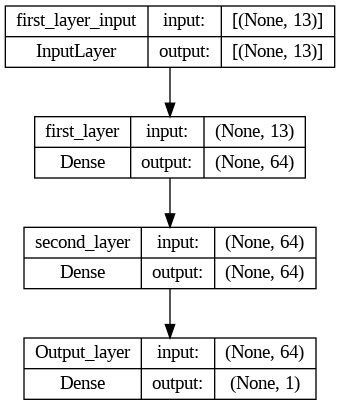

In [6]:
seq_model = keras.Sequential()
feature_len =len(x_train[0])


seq_model.add(Dense(64, activation="relu",name="first_layer"))
seq_model.add(Dense(64, activation="relu",name="second_layer"))
seq_model.add(Dense(1, activation="relu",name="Output_layer"))

seq_model.build(input_shape=(None,feature_len))  #None means it can take any batch size; 3 is the number of features in your input

print(seq_model.summary())
plot_model(seq_model,show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_layer (Dense)         (None, 64)                896       
                                                                 
 second_layer (Dense)        (None, 64)                4160      
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


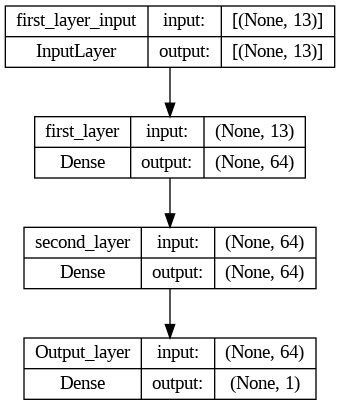

In [7]:
seq_model = keras.Sequential()
feature_len =len(x_train[0])


seq_model.add(Dense(64, activation="relu",name="first_layer",input_dim = 13)) # Alternate way to add input dimension directly keras sequantial
seq_model.add(Dense(64, activation="relu",name="second_layer"))
seq_model.add(Dense(1,name="Output_layer"))


print(seq_model.summary())
plot_model(seq_model,show_shapes=True)

In [8]:
import keras.backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

def R_squared(y_true, y_pred):
  SS_res =  K.sum(K.square( y_true-y_pred ))
  SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
  return ( 1 - (SS_res/(SS_tot)) )

In [9]:
tf.random.set_seed(42)

seq_model.compile(optimizer ='adam',
              loss = root_mean_squared_error,
              metrics = ["mae",R_squared])



history = seq_model.fit(x=x_train_sub, y=y_train_sub, epochs=500,batch_size=16,
                    validation_data=(x_val, y_val))

Epoch 1/500
19/19 [==============================] - 1s 18ms/step - loss: 23.6425 - mae: 21.9081 - R_squared: -6.2216 - val_loss: 20.4091 - val_mae: 18.9129 - val_R_squared: -14.6643
Epoch 2/500
19/19 [==============================] - 0s 5ms/step - loss: 21.1234 - mae: 19.3223 - R_squared: -5.3784 - val_loss: 17.7257 - val_mae: 16.0770 - val_R_squared: -10.4668
Epoch 3/500
19/19 [==============================] - 0s 4ms/step - loss: 17.2740 - mae: 15.2928 - R_squared: -3.0763 - val_loss: 13.5778 - val_mae: 11.8896 - val_R_squared: -5.4398
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 11.4013 - mae: 9.4476 - R_squared: -0.6144 - val_loss: 8.4837 - val_mae: 6.8100 - val_R_squared: -1.6623
Epoch 5/500
19/19 [==============================] - 0s 6ms/step - loss: 7.2308 - mae: 5.5046 - R_squared: 0.2939 - val_loss: 6.3601 - val_mae: 4.9117 - val_R_squared: -0.8989
Epoch 6/500
19/19 [==============================] - 0s 5ms/step - loss: 5.8422 - mae: 4.3578 - R_sq

In [10]:
data = pd.DataFrame(history.history)
#data.head(30)

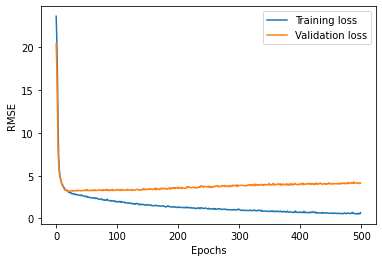

In [11]:
plt.plot(data['loss'], label="Training loss")
plt.plot(data['val_loss'],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [12]:
# Validation scores overfitted model 

print("Loss, MAE, R Squared")

print(seq_model.evaluate(x_val,y_val, verbose=0))

Loss, MAE, R Squared
[4.453267574310303, 2.7976129055023193, -0.445878267288208]


In [13]:
#Best epoch by validation loss RMSE

n_epochs_sequential = data[['val_loss']].idxmin().item()+1
print("Min loss obtained at epoch")
print(n_epochs_sequential)

Min loss obtained at epoch
22




```
**KFOLD** CROSS VALIDATION
```



In [14]:
def create_model(feature_len):
    model =  keras.Sequential()
    model.add(Dense(64,  activation='relu',input_dim=feature_len))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1,name="Output_layer"))

    model.compile(loss=root_mean_squared_error,
                  optimizer='adam',
                  metrics=['mae',R_squared])
    
    return model

In [15]:
kfold = KFold(n_splits=4, shuffle=True, random_state=42)

all_mae_histories = [] 
all_loss_histories = []
all_R_Squared_histories =[]
all_train_mae_histories = []
all_train_loss_histories = []
all_train_R_Squared_histories =[]

for fold, (train_indices, val_indices) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold+1}')
    
    model = create_model(len(x_train[0]))
    
    history = model.fit(x_train[train_indices], y_train[train_indices], epochs=500,batch_size=16, verbose=0, validation_data=(x_train[val_indices], y_train[val_indices]))
    
    mae_history = history.history["val_mae"]
    loss_history = history.history["val_loss"]
    R_Squared_history = history.history["val_R_squared"]
    train_mae_history = history.history["mae"]
    train_loss_history = history.history["loss"]
    train_R_Squared_history = history.history["R_squared"]

    all_mae_histories.append(mae_history)
    all_loss_histories.append(loss_history)
    all_R_Squared_histories.append(R_Squared_history)
    all_train_loss_histories.append(train_loss_history)
    all_train_mae_histories.append(train_mae_history)    
    all_train_R_Squared_histories.append(train_R_Squared_history)


    loss, mae,R_sq = model.evaluate(x_train[val_indices], y_train[val_indices], verbose=0)
    print(f'Validation loss: {loss:.4f}, Validation mae: {mae:.4f}\n,Validation Rsquared: {R_sq:.4f}\n')

Fold 1
Validation loss: 4.2089, Validation mae: 2.7546
,Validation Rsquared: 0.6848

Fold 2
Validation loss: 4.2044, Validation mae: 2.9563
,Validation Rsquared: 0.7732

Fold 3
Validation loss: 4.2429, Validation mae: 2.7889
,Validation Rsquared: 0.8228

Fold 4
Validation loss: 3.6341, Validation mae: 2.7142
,Validation Rsquared: 0.7462



In [16]:
print("Minimum RMSE Loss at : ")
print(np.argmin(pd.DataFrame(np.average(pd.DataFrame(all_loss_histories), axis =0))))
print("Minimum MAE at : ")
print(np.argmin(pd.DataFrame(np.average(pd.DataFrame(all_mae_histories), axis =0))))
print("Best R squared at : ")
print(np.argmax(pd.DataFrame(np.average(pd.DataFrame(all_R_Squared_histories), axis =0))))

Minimum RMSE Loss at : 
76
Minimum MAE at : 
80
Best R squared at : 
76


In [17]:
print("Minimum Average across RMSE Validation Loss across 4 folds at : ")
print(np.min(pd.DataFrame(np.average(pd.DataFrame(all_loss_histories), axis =0))).item())


Minimum RMSE Loss at : 
3.2525867223739624


histories_matrix.shape = (4, 500)
minimum val loss at epoch: 76


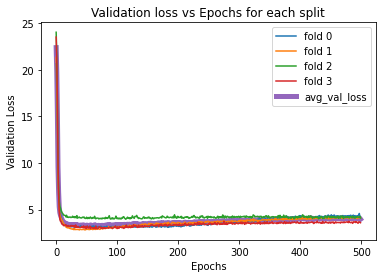

In [18]:
# Plot validation losses vs epoch for each fold
for i,entry in enumerate(all_loss_histories):
  label="fold " + str(i) 
  plt.plot(entry, label=label)

# compute and plot the avg val loss across folds
loss_histories_matrix = np.array(all_loss_histories)
print(f"histories_matrix.shape = {loss_histories_matrix.shape}")
avg_loss = loss_histories_matrix.mean(axis=0)
plt.plot(avg_loss, label='avg_val_loss', linewidth=5, zorder=-10)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.title("Validation loss vs Epochs for each split")
plt.legend()

# compute the epoch at which the teh avg validation loss is min
best_epoch_kfold = np.argmin(avg_loss)
print(f"minimum val loss at epoch: {best_epoch_kfold}")

histories_matrix.shape = (4, 500)
maximum R_squared at epoch: 76


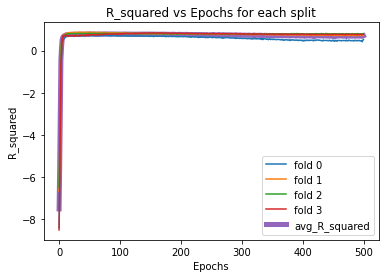

In [19]:
# Plot validation losses vs epoch for each fold
for i,entry in enumerate(all_R_Squared_histories):
  label="fold " + str(i) 
  plt.plot(entry, label=label)

# compute and plot the avg val loss across folds
R_squared_histories_matrix = np.array(all_R_Squared_histories)
print(f"histories_matrix.shape = {R_squared_histories_matrix.shape}")
avg_R_squared = R_squared_histories_matrix.mean(axis=0)
plt.plot(avg_R_squared, label='avg_R_squared', linewidth=5, zorder=-10)
plt.xlabel("Epochs")
plt.ylabel("R_squared")
plt.title("R_squared vs Epochs for each split")
plt.legend()

# compute the epoch at which the teh avg validation loss is min
best_epoch = np.argmax(avg_R_squared)
print(f"maximum R_squared at epoch: {best_epoch}")

In [20]:
# Evaluation on test set with best fold obtained with random validation

Final_model_sequential = create_model(len(x_train[0]))
Final_model_sequential.fit(x_train, y_train, epochs=n_epochs_sequential, verbose=0)
print("Loss, MAE, R Squared")
print(Final_model_sequential.evaluate(x_test,y_test, verbose=0))


Loss, MAE, R Squared
[4.448669910430908, 3.1712591648101807, 0.4502204656600952]


In [21]:
# Evaluation on test set with best fold obtained with 4 Fold validation

Final_model_kfold = create_model(len(x_train[0]))
Final_model_kfold.fit(x_train, y_train, epochs=best_epoch_kfold, verbose=0)
print("Loss, MAE, R Squared")
print(Final_model_kfold.evaluate(x_test,y_test, verbose=0))

Loss, MAE, R Squared
[3.76567006111145, 2.6126508712768555, 0.5587548017501831]
